# Machine Learning Project : Regression
### Name : Wessim Slimi
### Repository : https://github.com/WessimSlimiImt/IMT_ML_project.git

In [3]:
# doing basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tqdm import tqdm_notebook as tqdm
from sklearn import preprocessing, datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


# defining Constants
index = 0 # 0 for HousingData.csv 1 for ProstateCancer.csv
root 	  = 'data'
file_name = 'HousingData.csv'
data_path = os.path.join(root,file_name)
test_size = 0.2 # 80% for trainig and 20% for testing

# 1. Reading the Data and Data Visualization

In [23]:
# reading dataset
df = pd.read_csv(data_path)
# removing nan values from dataset
df = df.dropna()
# removing outliers
df = df[~(df['MEDV'] >= 50.0)]
# normalizing data
normalized_df=(df-df.min())/(df.max()-df.min())
# Shuffeling the data
normalized_df = shuffle(normalized_df)
# splitting the data into training and testing
df_train, df_test = train_test_split(normalized_df, test_size=test_size)
# reindexing the dataframe
df_train.index = list(range(len(df_train)))
df_test.index = list(range(len(df_test)))

# preparing the dataset
x_train = df_train.loc[:,column_sels]
y_train = df_train['MEDV']
x_test = df_test.loc[:,column_sels]
y_test = df_test['MEDV']

# dataframe that will contain predictions for each model
res = pd.DataFrame()
res['GroundTruth'] = y_test


In [14]:
# removing outliers
df_train = df_train[~(df_train['MEDV'] >= 50.0)]
print(np.shape(df_train))

(305, 14)


Highly correlated features are : ['INDUS', 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


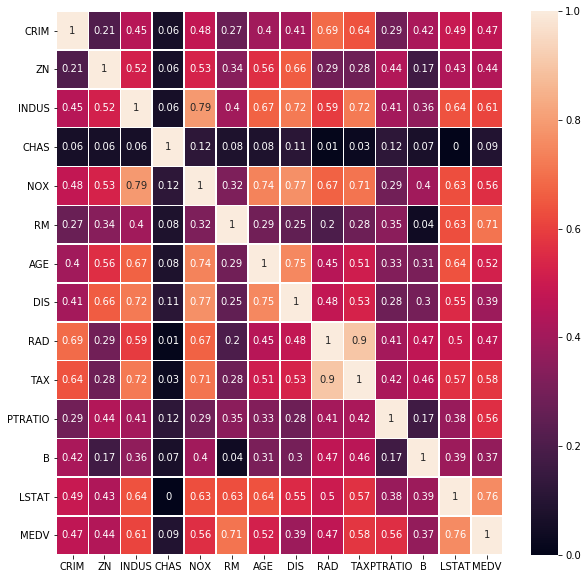

In [15]:
# checking correlation matrix to know which features will be important than others
correlation_matrix = np.abs(df_train.corr().round(2))
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data=correlation_matrix,annot=True,linewidths=0.5,ax=ax)

# printing features with correlation values higher than 0.5 with MEDV
d = correlation_matrix['MEDV']

column_names = []
for i in range(len(d)):
    if d[i]>0.5:
        column_names.append(list(d.index)[i])
print('Highly correlated features are : {}'.format(column_names))

TAX and RAD are highly correlated features.
The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors

E:\Users\Wessim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\Wessim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Users\Wessim\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

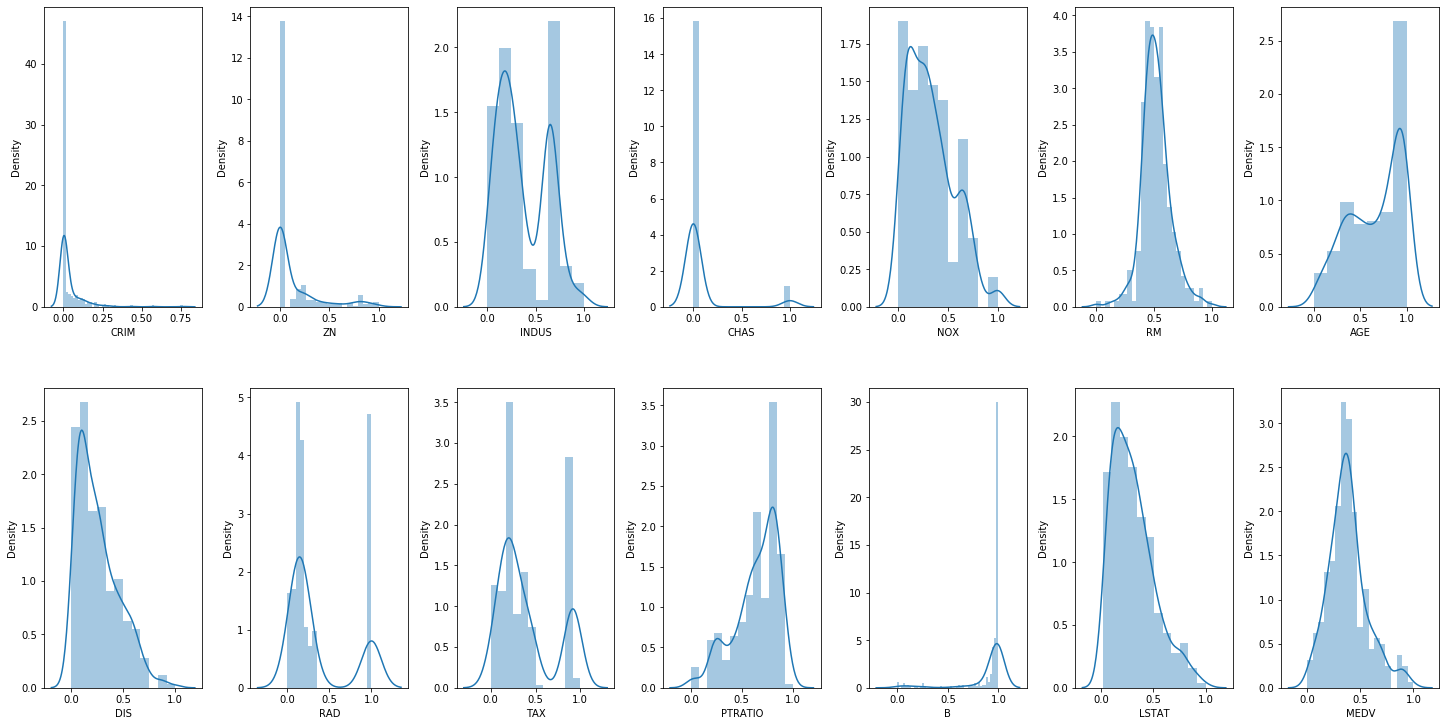

In [16]:
# plotting distributions
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k,v in df_train.items():
    try:
        sns.distplot(v, ax=axs[index])
    except:
        pass
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From the Correlation matrix variables : LSTAT, INDUS, RM, TAX, NOX, PTRATIO has correlation score above 0.5. Which is good indication to use them as features for predictions. Lets plot them against MEDV

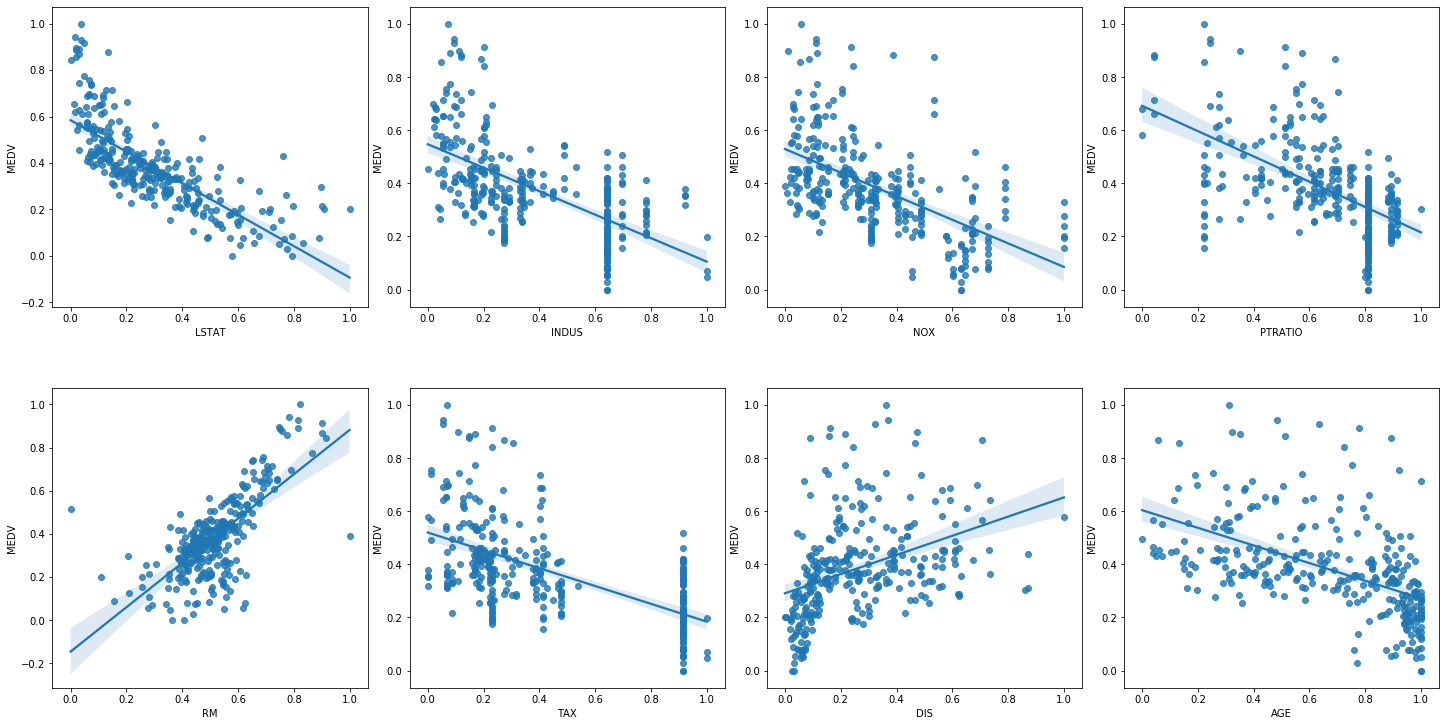

In [17]:
# Scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x_train = df_train.loc[:,column_sels]
y_train = df_train['MEDV']
x_train = pd.DataFrame(data=min_max_scaler.fit_transform(x_train), columns=column_sels)



fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y_train, x=x_train[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

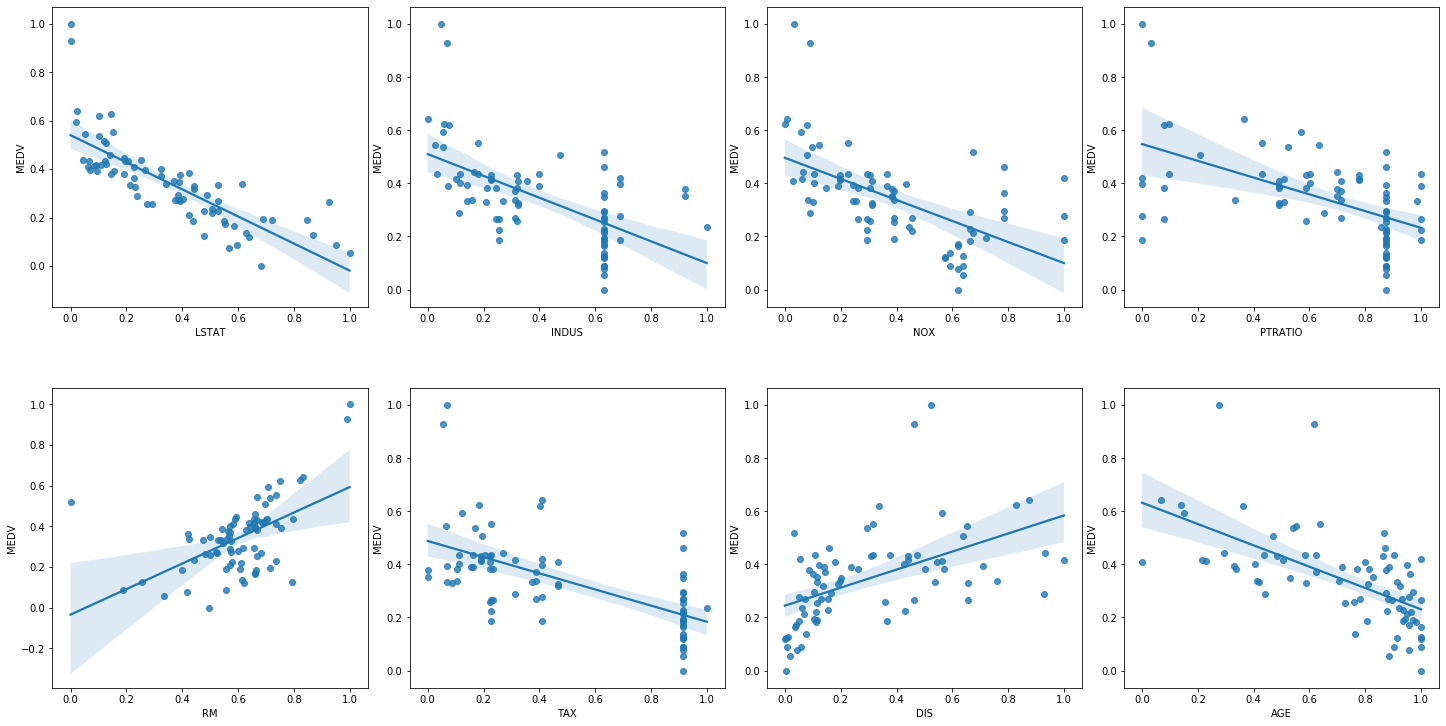

In [10]:
# Scaling the data
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x_test = df_test.loc[:,column_sels]
y_test = df_test['MEDV']
x_test = pd.DataFrame(data=min_max_scaler.fit_transform(x_test), columns=column_sels)



fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y_test, x=x_test[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# 2. Data Transformation

So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. 

In [18]:
# Let's try to remove the skewness of the data trough log transformation.
y_train =  np.log1p(y_train)
y_test =  np.log1p(y_test)
for col in x_train.columns:
    if np.abs(x_train[col].skew()) > 0.3:
        x_train[col] = np.log1p(x_train[col])
        x_test[col] = np.log1p(x_test[col])

# 3. Making predictions

### 3.1. Linear Regression

In [21]:
# Creation of the linear regressor
l_regression = linear_model.LinearRegression()

# Shuffeling the data
kf = KFold(n_splits=10)

# fitting data
l_regression.fit(x_train, y_train)

# evaluating the model
scores = cross_val_score(l_regression, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')

print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())) 

MSE: -0.01 (+/- 0.01)


In [24]:
# Scaling the data
scores = cross_val_score(l_regression, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')
y_pred = l_regression.predict(x_test)

res['Linear regression'] = y_pred


### 3.2. Linear Ridge Regression

In [25]:
scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
l_ridge.fit(x_train, y_train)
y_pred = l_ridge.predict(x_test)
res['LinearRegressionRidge'] = y_pred
scores = cross_val_score(l_ridge, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.01 (+/- 0.01)


### 3.3. Polynomial Regression with degree = 3

In [26]:
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
res['Polynomial'] = y_pred
scores = cross_val_score(model, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.01 (+/- 0.01)


        Linear Regression             : MSE: -0.04 (+/- 0.01)
        Linear Ridge Regression       : MSE: -0.04 (+/- 0.01)
        Polynomial Regression deg = 3 : MSE: -0.03 (+/- 0.01)

### 3.4. SVR with kernel = rbf

In [27]:
# importing SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

#proceeding to GridSearch to tune hyperparameters
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
grid_sv.fit(x_train, y_train)
y_pred = grid_sv.predict(x_test)
res['SVR'] = y_pred
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1.0,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE: -0.01 (+/- 0.00)


### 3.5. Decision Tree Regressor

In [28]:
# loading Model
desc_tr = DecisionTreeRegressor(max_depth=5)

# GridSearch to tune Hyperparameters
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_train, y_train)
y_pred = grid_sv.predict(x_test)
res['DecisionTreeRegressor'] = y_pred
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
MSE: -0.01 (+/- 0.01)


### 3.6. Kneighbours Regressor

In [29]:
knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_train, y_train)
y_pred = grid_sv.predict(x_test)
res['KNeighborsRegressor'] = y_pred
print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')
KNN Accuracy: -0.01 (+/- 0.01)


### 3.7. Gradient Boosting

In [30]:
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')

grid_sv.fit(x_train, y_train)
y_pred = grid_sv.predict(x_test)
res['GradientBoostingRegressor'] = y_pred
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_test, y_test, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=30, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE: -0.00 (+/- 0.00)


In [ ]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

In [ ]:
plt.plot(res.index, res['GradientBoostingRegressor'].values)

In [ ]:
for name in res.columns:
    plt.plot(res[name].values)

In [ ]:
res.sort_index().plot()

In [ ]:
print(res.sort_index().head())